<a href="https://colab.research.google.com/github/quartermaine/Text-Mining-Project/blob/master/Text_mining_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook provides the code and steps used to create the project for the Text Mining Course

## Download the data from kaggle

In this section we are going to download the dataset (Amazon Reviews) we are going to use for the project with the Kaggle API and then extract the 2 files (train,test) to content dir.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import warnings

warnings.filterwarnings('ignore')

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

print(tf.__version__)

2.0.0


In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Dec 22 08:49 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
import os
print(os.listdir())


['.config', 'kaggle.json', 'sample_data']


In [0]:
# make kaggle directory
!mkdir -p ~/.kaggle

In [0]:
# move kaggle.json to .kaggle directory
!mv /content/kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json
# set the path to /content
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
# make data directory 
!mkdir -p data
# Download dataset
!kaggle datasets download -d bittlingmayer/amazonreviews -p data

 98% 481M/493M [00:11<00:00, 24.2MB/s]
100% 493M/493M [00:11<00:00, 43.4MB/s]


In [0]:
os.listdir()

['.config', 'data', 'sample_data']

In [0]:
import zipfile
# extract the files
local_zip = '/content/data/amazonreviews.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data/amazonreviews')
zip_ref.close()


In [0]:
!rm /content/data/amazonreviews.zip # remove the zip file

## Reading the data and get sentences and labels



In this section we read the data from the files ,encode them to 'utf-8'
and create lists for the sentences and the labels.

In [0]:
import bz2
# train file
bz_file = bz2.BZ2File('/content/data/amazonreviews/train.ft.txt.bz2')
train_file = bz_file.readlines()
# test file
bz_file = bz2.BZ2File('/content/data/amazonreviews/test.ft.txt.bz2')
test_file = bz_file.readlines()

In [0]:
train_file = [x.decode('utf-8') for x in train_file]
test_file = [x.decode('utf-8') for x in test_file]


In [0]:
train_file[0:10]

['__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n',
 "__label__2 The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.\n",
 '__label__2 Amazing!: This s

In [0]:
test_file[0:10]

['__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"\n',
 "__label__2 One of the best game music soundtracks - for a game I didn't really play: Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too 

In [0]:
train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_file]
train_sentences = [x.split(' ', 1)[1][:-1].lower() for x in train_file]

test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file]
test_sentences = [x.split(' ', 1)[1][:-1].lower() for x in test_file]


In [0]:
print("Count class {0} \nCount class {1}".format(train_labels.count(0),train_labels.count(1)))
# we have a balanced dataset

Count class 1800000 
Count class 1800000


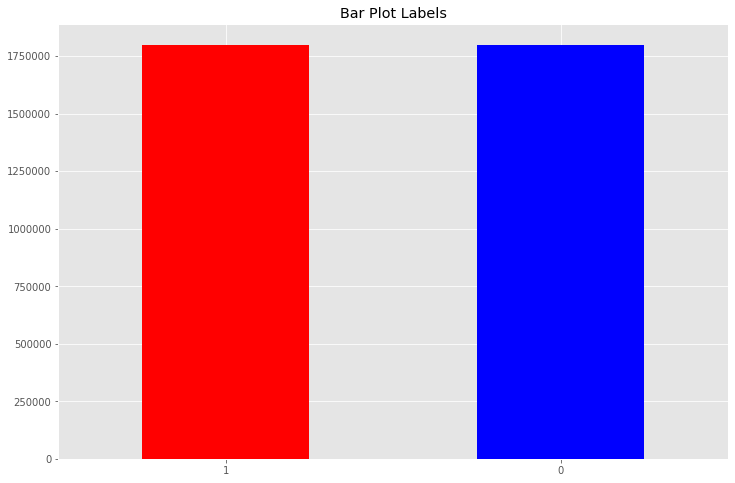

In [0]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(12,8))
plt.style.use('ggplot')
train_series = pd.Series(train_labels)
train_series.value_counts().plot(kind='bar',figsize=(12, 8), rot=0,color=['r','b']);
plt.title('Bar Plot Labels')
plt.show()

From the plot above we can see that we have a balanced dataset rearding the classes of the train data.

## Function to plot frequencies


This is a function to plot the frequencies of the most common words

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def get_num_words_per_sample(sample_texts):
    """Returns the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=50):
    """Plots the frequency distribution of n-grams.
    # Arguments
        samples_texts: list, sample texts.
        ngram_range: tuple (min, mplt), The range of n-gram values to consider.
            Min and mplt are the lower and upper bound values for the range.
        num_ngrams: int, number of n-grams to plot.
            Top `num_ngrams` frequent n-grams will be plotted.
    """
    # Create args required for vectorizing.
    kwargs = {
            'ngram_range': (1, 1),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
    vectorizer = CountVectorizer(**kwargs)

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = list(vectorizer.get_feature_names())
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams]>>> from sklearn.datasets import load_iris
    idx = np.arange(num_ngrams)
    plt.figure(figsize=(15,12))
    plt.style.use('ggplot')
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=45)
    plt.show()



In [0]:
get_num_words_per_sample(train_sentences)

70.0

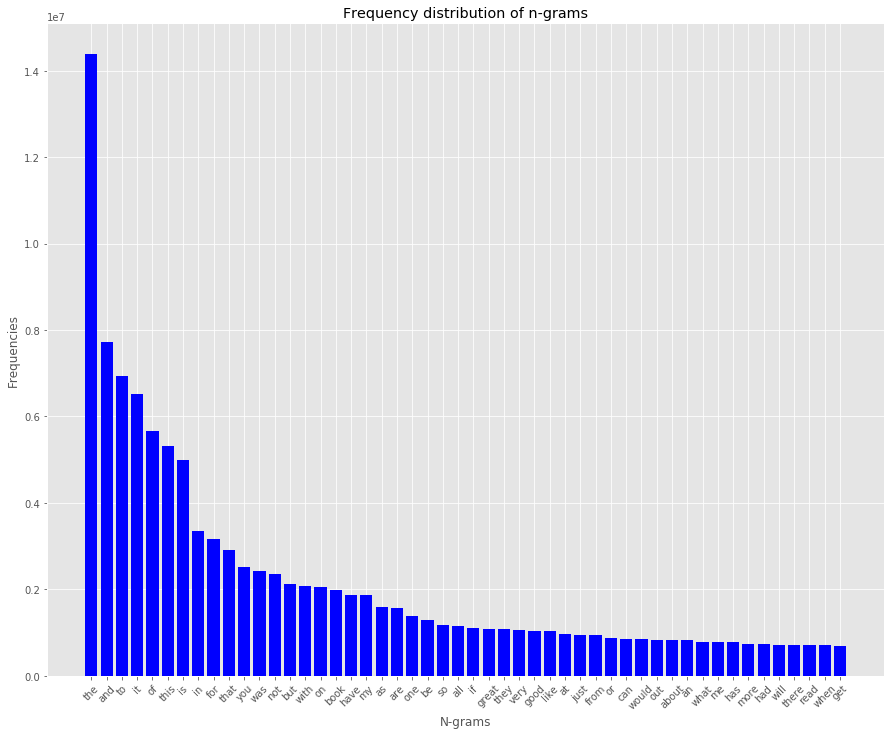

In [0]:
plot_frequency_distribution_of_ngrams(train_sentences)

In [0]:
import pandas as pd
train_df = pd.DataFrame({'reviews': train_sentences, 'labels': train_labels})
print('columns :\n',train_df.columns)
print('\ncolumn types:\n',train_df.dtypes)
train_df.head(n=10)

columns :
 Index(['reviews', 'labels'], dtype='object')

column types:
 reviews    object
labels      int64
dtype: object


,reviews,labels
0,stuning even for the non-gamer: this sound tra...,1
1,the best soundtrack ever to anything.: i'm rea...,1
2,amazing!: this soundtrack is my favorite music...,1
3,excellent soundtrack: i truly like this soundt...,1
4,"remember, pull your jaw off the floor after he...",1
5,an absolute masterpiece: i am quite sure any o...,1
6,"buyer beware: this is a self-published book, a...",0
7,glorious story: i loved whisper of the wicked ...,1
8,a five star book: i just finished reading whis...,1
9,whispers of the wicked saints: this was a easy...,1


In [0]:
test_df = pd.DataFrame({'reviews': test_sentences, 'labels': test_labels})
print('columns :\n',test_df.columns)
print('\ncolumn types:\n',test_df.dtypes)
test_df.head(n=10)

columns :
 Index(['reviews', 'labels'], dtype='object')

column types:
 reviews    object
labels      int64
dtype: object


,reviews,labels
0,great cd: my lovely pat has one of the great v...,1
1,one of the best game music soundtracks - for a...,1
2,batteries died within a year ...: i bought thi...,0
3,"works fine, but maha energy is better: check o...",1
4,great for the non-audiophile: reviewed quite a...,1
5,dvd player crapped out after one year: i also ...,0
6,"incorrect disc: i love the style of this, but ...",0
7,dvd menu select problems: i cannot scroll thro...,0
8,unique weird orientalia from the 1930's: exoti...,1
9,"not an ""ultimate guide"": firstly,i enjoyed the...",0


In [0]:
# encoder = tfds.features.text.SubwordTextEncoder.build_from_corpus(
#     train_df['reviews'][:2], target_vocab_size=2**15)

# encoder.subwords
# train_target = train_df.pop('labels')
# train_dataset = tf.data.Dataset.from_tensor_slices((train_df.values, train_target.values))
# for feat, targ in train_dataset.take(5):
#   print ('Features: {}, Target: {}'.format(feat, targ))

# df_train = train_dataset.shuffle(len(train_df)).batch(1)
# df_train

## Function to create padded sequences 
## Function to plot train/validation accuracy/loss
## Split train data to train and validation


This is a function for preprocessing in order to create padded 
sequences

In [0]:
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.preprocessing import text

# Vectorization parameters
# Limit on the number of features. We use the top 20K features.
TOP_K = 10000

# Limit on the length of text sequences. Sequences longer than this
# will be truncated.
MAX_SEQUENCE_LENGTH = 120

def sequence_vectorize(train_texts, val_texts):
    """Vectorizes texts as sequence vectors.

    1 text = 1 sequence vector with fixed length.

    # Arguments
        train_texts: list, training text strings.
        val_texts: list, validation text strings.

    # Returns
        x_train, x_val, word_index: vectorized training and validation
            texts and word index dictionary.
    """
    # Create vocabulary with training texts.
    tokenizer = text.Tokenizer(num_words=TOP_K)
    tokenizer.fit_on_texts(train_texts)

    # Vectorize training and validation texts.
    x_train = tokenizer.texts_to_sequences(train_texts)
    x_val = tokenizer.texts_to_sequences(val_texts)

    # Get max sequence length.
    max_length = len(max(x_train, key=len))
    if max_length > MAX_SEQUENCE_LENGTH:
        max_length = MAX_SEQUENCE_LENGTH

    # Fix sequence length to max value. Sequences shorter than the length are
    # padded in the beginning and sequences longer are truncated
    # at the beginning.
    x_train = sequence.pad_sequences(x_train, maxlen=max_length)
    x_val = sequence.pad_sequences(x_val, maxlen=max_length)
    return x_train, x_val, tokenizer.word_index

In [0]:
x_train,x_test,indx = sequence_vectorize(train_sentences,test_sentences)

In [0]:
import numpy as np
training_labels_final = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
x_train.shape

(3600000, 120)

In [0]:
x_test.shape

(400000, 120)

In [0]:
training_labels_final.shape

(3600000,)

In [0]:
y_test.shape

(400000,)

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.figure(figsize=(12,8))
    plt.style.use('ggplot')
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.title('Train and Validation '+string)
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()



In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_train, training_labels_final, test_size=0.20)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)


(2880000, 120)
(2880000,)
(720000, 120)
(720000,)


## Training Different Models


In this section we are training four models
Naive Bayes,
XgBoost,
Small Sequential,
LSTM


### Naive Bayes Model

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn import  metrics
import time

gnb = GaussianNB()

start_time= time.time()
model_naive = gnb.fit(X_train, y_train)
y_pred_naive = model_naive.predict(x_test)

end_time = time.time()-start_time
measured_time = time.strftime("%H:%M:%S", time.gmtime(end_time))

print('\nTime to execute fit :' ,measured_time)

count_misclassified_naive = (y_test != y_pred_naive).sum()

accuracy_naive = metrics.accuracy_score(y_test, y_pred_naive)

print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], count_misclassified_naive))

print('Accuracy on test data : {:.2f}'.format(accuracy_naive))



Time to execute fit : 00:00:05
Number of mislabeled points out of a total 400000 points : 192841
Accuracy on test data : 0.52


### Xgboost Model




In [0]:
from xgboost.sklearn import XGBClassifier

params = {

'objective': 'binary:logistic',

'max_depth': 3,

'learning_rate': 1.0,

'silent': 1,

'n_estimators': 80

}

start_time= time.time()

model_xbg = XGBClassifier(**params).fit(X_train, y_train)
y_pred_xgb = model_xbg.predict(x_test)

end_time = time.time()-start_time
measured_time = time.strftime("%H:%M:%S", time.gmtime(end_time))

print('\nTime to execute fit :' ,measured_time)




Time to execute fit : 00:21:25


In [0]:
# how did our model perform?

count_misclassified_xgb = (y_test != y_pred_xgb).sum()

print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], count_misclassified_xgb))

accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb)

print('Accuracy on test data : {:.2f}'.format(accuracy_xgb))

Number of mislabeled points out of a total 400000 points : 136190
Accuracy: 0.66


### Small Sequential Model


In [0]:
vocab_size = 10000
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=120),
    tf.keras.layers.Flatten(),
     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

num_epochs = 10

early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)
callbacks = [early_stopping]

Using TensorFlow backend.


In [0]:
# def _data_generator(x, y, num_features, batch_size):
#     """Generates batches of vectorized texts for training/validation.

#     # Arguments
#         x: np.matrix, feature matrix.
#         y: np.ndarray, labels.
#         num_features: int, number of features.
#         batch_size: int, number of samples per batch.

#     # Returns
#         Yields feature and label data in batches.
#     """
#     num_samples = x.shape[0]
#     num_batches = num_samples // batch_size
#     if num_samples % batch_size:
#         num_batches += 1

#     while 1:
#         for i in range(num_batches):
#             start_idx = i * batch_size
#             end_idx = (i + 1) * batch_size
#             if end_idx > num_samples:
#                 end_idx = num_samples
#             x_batch = x[start_idx:end_idx]
#             y_batch = y[start_idx:end_idx]
#             yield x_batch, y_batch

# # Create training and validation generators.
# num_features = 1
# batch_size = 32

# training_generator = _data_generator(
#     X_train, y_train, num_features, batch_size)
# validation_generator = _data_generator(
#     X_val, y_val, num_features, batch_size)

# # Get number of training steps. This indicated the number of steps it takes
# # to cover all samples in one epoch.
# steps_per_epoch = X_train.shape[0] // batch_size
# if x_train.shape[0] % batch_size:
#     steps_per_epoch += 1

# # Get number of validation steps.
# validation_steps = X_val.shape[0] // batch_size
# if X_val.shape[0] % batch_size:
#     validation_steps += 1

# history = model.fit_generator(
#     generator=training_generator,
#     steps_per_epoch=steps_per_epoch,
#     validation_data=validation_generator,
#     validation_steps=validation_steps,
#     callbacks=callbacks,
#     epochs=num_epochs,
#     verbose=2)

In [0]:
start_time= time.time()

history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val,y_val),
                   callbacks=callbacks,batch_size=32)
end_time = time.time()-start_time

measured_time = time.strftime("%H:%M:%S", time.gmtime(end_time))

print('\nTime to execute training :' ,measured_time)



Train on 2880000 samples, validate on 720000 samples
Epoch 1/10
2880000/2880000 [==============================] - 523s 182us/sample - loss: 0.2427 - accuracy: 0.9014 - val_loss: 0.2246 - val_accuracy: 0.9101
Epoch 2/10
2880000/2880000 [==============================] - 525s 182us/sample - loss: 0.2390 - accuracy: 0.9033 - val_loss: 0.2229 - val_accuracy: 0.9111
Epoch 3/10
2880000/2880000 [==============================] - 521s 181us/sample - loss: 0.2378 - accuracy: 0.9041 - val_loss: 0.2221 - val_accuracy: 0.9114
Epoch 4/10
2880000/2880000 [==============================] - 520s 181us/sample - loss: 0.2368 - accuracy: 0.9046 - val_loss: 0.2227 - val_accuracy: 0.9113
Epoch 5/10
2880000/2880000 [==============================] - 521s 181us/sample - loss: 0.2363 - accuracy: 0.9048 - val_loss: 0.2226 - val_accuracy: 0.9122
Epoch 6/10
2880000/2880000 [==============================] - 520s 181us/sample - loss: 0.2361 - accuracy: 0.9051 - val_loss: 0.2232 - val_accuracy: 0.9109
Epoch 7/10


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


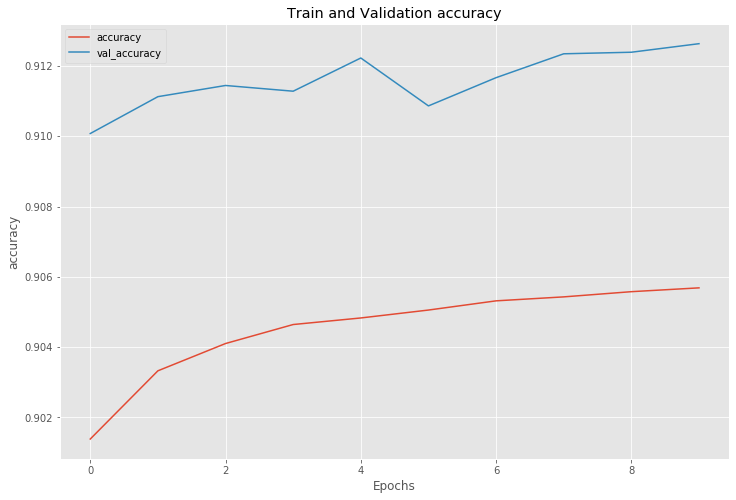

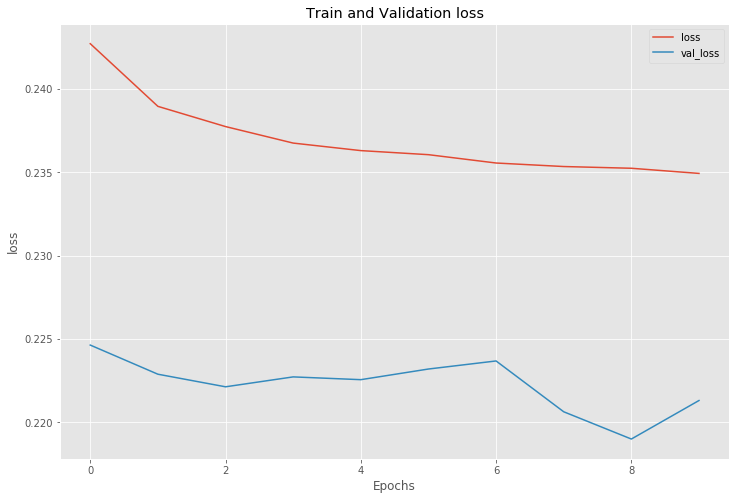

In [0]:
%time



plot_graphs(history,'accuracy')

plot_graphs(history,'loss')

#plt.savefig('simple_model.jpg')

In [0]:
score, acc = model.evaluate(x_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)


400000/400000 [==============================] - 30s 75us/sample - loss: 0.2228 - accuracy: 0.9116
Test score: 0.2227530629916489
Test accuracy: 0.91161


### LSTM Model


In [0]:
vocab_size = 20000
embedding_dim = 128


# lstm_model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=120),
#     tf.keras.layers.SpatialDropout1D(0.2),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,dropout=0.2)),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


lstm_model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])


In [0]:
import time

start_time= time.time()

lstm_history = lstm_model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val,y_val),
                    callbacks=callbacks,batch_size=16,shuffle=True)

end_time = time.time()-start_time

measured_time = time.strftime("%H:%M:%S", time.gmtime(end_time))

print('\nTime to execute training :' ,measured_time)


Train on 2880000 samples, validate on 720000 samples
Epoch 1/10
2880000/2880000 [==============================] - 8070s 3ms/sample - loss: 0.1932 - accuracy: 0.9269 - val_loss: 0.1550 - val_accuracy: 0.9414
Epoch 2/10
2880000/2880000 [==============================] - 7953s 3ms/sample - loss: 0.1530 - accuracy: 0.9445 - val_loss: 0.1433 - val_accuracy: 0.9464
Epoch 3/10
2880000/2880000 [==============================] - 7609s 3ms/sample - loss: 0.1394 - accuracy: 0.9501 - val_loss: 0.1368 - val_accuracy: 0.9492
Epoch 4/10
2880000/2880000 [==============================] - 7614s 3ms/sample - loss: 0.1303 - accuracy: 0.9540 - val_loss: 0.1350 - val_accuracy: 0.9499
Epoch 5/10
2880000/2880000 [==============================] - 7614s 3ms/sample - loss: 0.1231 - accuracy: 0.9570 - val_loss: 0.1339 - val_accuracy: 0.9505
Epoch 6/10
2880000/2880000 [==============================] - 7632s 3ms/sample - loss: 0.1168 - accuracy: 0.9597 - val_loss: 0.1376 - val_accuracy: 0.9495
Epoch 7/10
288000

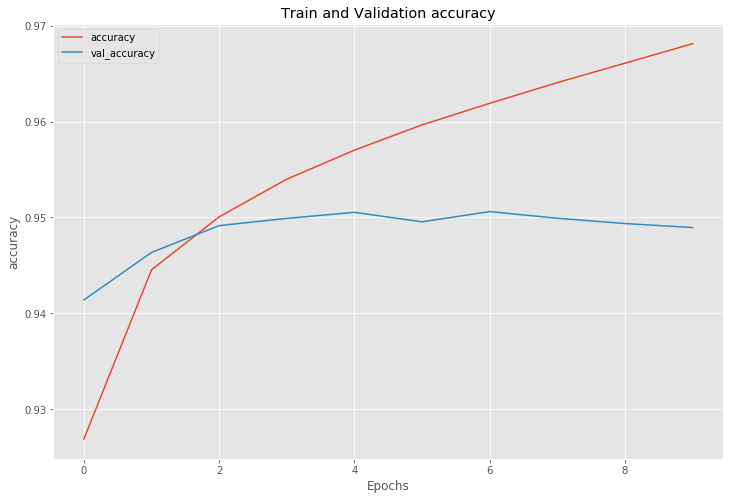

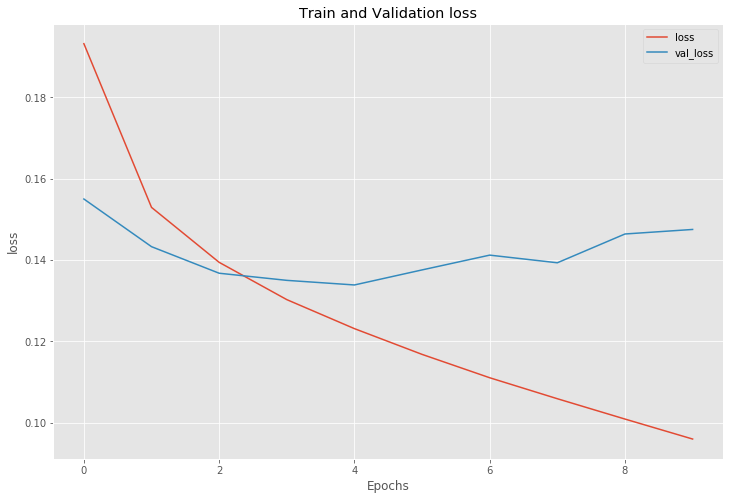

In [0]:
plot_graphs(lstm_history,'accuracy')
plot_graphs(lstm_history,'loss')

In [0]:
#### lstm_score, lstm_acc = lstm_model.evaluate(x_test, y_test)
print('Test score:', lstm_score)
print('Test accuracy:', lstm_acc)

Test score: 0.14862737049942837
Test accuracy: 0.94809
Test score: 0.14862737049942837
Test accuracy: 0.94809


## Extract the word embeddings 

In [0]:
e = lstm_model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(20000, 128)


In [0]:
import io

reverse_word_index = dict([(value, key) for (key, value) in indx.items()])

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1,vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [0]:
indx

{'the': 1,
 'and': 2,
 'i': 3,
 'a': 4,
 'to': 5,
 'it': 6,
 'of': 7,
 'this': 8,
 'is': 9,
 'in': 10,
 'for': 11,
 'that': 12,
 'was': 13,
 'not': 14,
 'you': 15,
 'but': 16,
 'with': 17,
 'on': 18,
 'book': 19,
 'have': 20,
 'my': 21,
 'as': 22,
 'are': 23,
 'one': 24,
 'be': 25,
 'so': 26,
 'all': 27,
 'if': 28,
 'great': 29,
 'very': 30,
 'good': 31,
 'like': 32,
 'they': 33,
 'at': 34,
 'just': 35,
 'from': 36,
 'or': 37,
 'would': 38,
 'out': 39,
 'about': 40,
 'an': 41,
 'me': 42,
 'has': 43,
 'what': 44,
 'more': 45,
 'had': 46,
 'will': 47,
 'read': 48,
 'when': 49,
 "it's": 50,
 'get': 51,
 'no': 52,
 'up': 53,
 'by': 54,
 'time': 55,
 'there': 56,
 'only': 57,
 'your': 58,
 'can': 59,
 'movie': 60,
 'he': 61,
 'his': 62,
 "don't": 63,
 'really': 64,
 'some': 65,
 'do': 66,
 'well': 67,
 'than': 68,
 'them': 69,
 'who': 70,
 'much': 71,
 'even': 72,
 'first': 73,
 'other': 74,
 'we': 75,
 'these': 76,
 'her': 77,
 'after': 78,
 'love': 79,
 'because': 80,
 'buy': 81,
 'too': 

In [0]:
# save the model weights 
lstm_model.save_weights("lstm_model.h5")

## References



---


1. http://deeplearning.net/tutorial/lstm.html
2. https://machinelearningmastery.comgentle-introduction-xgboost-applied-machine-learning/
3. https://developers.google.com/machine-learning/guides/text-classification
4. https://monkeylearn.com/text-classification/
5. https://projector.tensorflow.org/?hl=zh-cn
6. https://keras-team.github.io/keras-tuner/
7. https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/
8. https://fasttext.cc/docs/en/supervised-tutorial.html
9. https://www.tensorflow.org/tutorials/text/text_classification_rnn



---





## Other

In [0]:
# vocab_size = 10000
# embedding_dim = 16
# max_length = 120
# trunc_type='post'
# oov_tok = "<OOV>"


# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
# tokenizer.fit_on_texts(train_sentences)
# word_index = tokenizer.word_index
# sequences = tokenizer.texts_to_sequences(train_sentences)
# padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# testing_sequences = tokenizer.texts_to_sequences(test_sentences)
# testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# def decode_review(text):
#     return ' '.join([reverse_word_index.get(i, '?') for i in text])

# print(decode_review(padded[1]))
# print(train_sentences[1])

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(6, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.summary()


In [0]:
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# def decode_review(text):
#     return ' '.join([reverse_word_index.get(i, '?') for i in text])

# print(decode_review(padded[1]))
# print(train_sentences[1])

In [0]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(6, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.summary()
